# PCA Task:
🎯 Question:
You are given a dataset of biomedical voice measurements from people with and without Parkinson’s Disease.
Your task is to apply PCA to reduce dimensionality and analyze how well the principal components separate the two classes (Parkinson’s vs. Healthy).
 
🧪 Instructions:
Load the Parkinson’s dataset.
 
Drop the name column (not a feature).
 
Standardize the features using StandardScaler.
 
Apply PCA to reduce dimensions to 2 or 3 components.
 
Visualize the first two components in a scatter plot colored by disease status (status column).
 
Plot the explained variance ratio and cumulative explained variance.
 
Analyze whether PCA reveals good separation between healthy and Parkinson’s-affected individuals.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [8]:
df = pd.read_csv("parkinsons.csv")
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


Step-2 : Drop the name column (not a feature).

In [12]:
df=df.drop(columns=['name'])

In [14]:
df.head()


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


Step 3: Standardize the features using StandardScaler.

In [21]:
X = df.drop(columns=['status'])  
y = df['status']
scaler = StandardScaler()
X_scales= scaler.fit_transform(X)

Step 4: Apply PCA to reduce dimensions to 2 or 3 components.

In [26]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scales)

In [28]:
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['status'] = y

Step 4: Visualize the first two components in a scatter plot colored by disease status (status column).

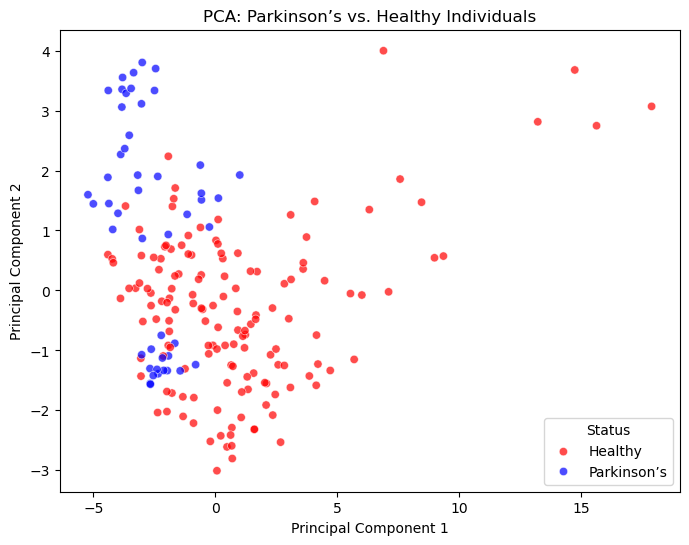

In [31]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue=df_pca['status'], palette=['blue', 'red'], alpha=0.7, data=df_pca)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Parkinson’s vs. Healthy Individuals')
plt.legend(title='Status', labels=['Healthy', 'Parkinson’s'])
plt.show()

Step 5: Plot the explained variance ratio and cumulative explained variance.

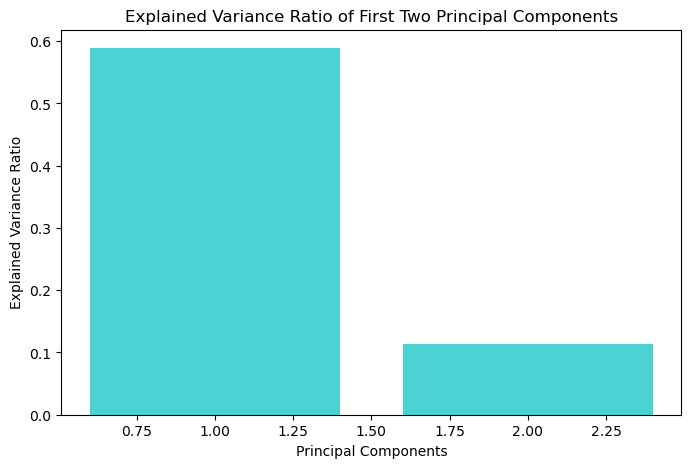

In [34]:
plt.figure(figsize=(8,5))
plt.bar(range(1, 3), pca.explained_variance_ratio_, alpha=0.7, color='c', label='Individual Explained Variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('Explained Variance Ratio of First Two Principal Components')
plt.show()


Step 6: Analyze whether PCA reveals good separation between healthy and Parkinson’s-affected individuals.

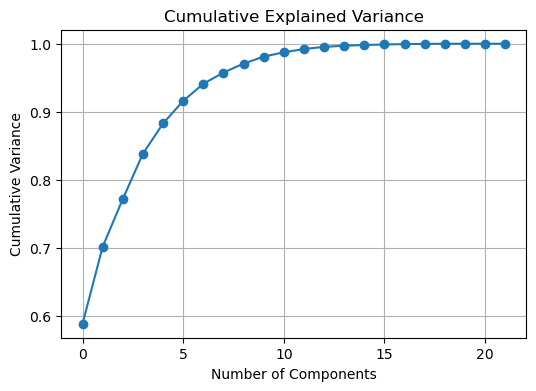

In [39]:
pca_full=PCA().fit(X_scales)
plt.figure(figsize=(6,4))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
plt.grid(True)
plt.show()